In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()


'/Users/anshumantewary/Downloads/IPBA/Python/Codes'

In [4]:
data = pd.read_csv('/Users/anshumantewary/Downloads/IPBA/Python/Module 5- Predictive Analytics/1. Logistic Regression in Python Demo Part 1/dm.csv')

In [5]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [6]:
#the marketer has defined a customer as a good customer whose spend is greater than the avg spend
data['target'] = data['AmountSpent'].map(lambda x: 1 if x>data['AmountSpent'].mean() else 0)

In [7]:
data['target'].value_counts()

0    601
1    399
Name: target, dtype: int64

In [8]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,1


In [9]:
data = data.drop('AmountSpent', axis = 1)

In [10]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [11]:
data['History'].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [12]:
data.History.isnull().sum()

303

In [13]:
data['History'] = data['History'].fillna('NewCust')

In [14]:
data['History'].value_counts() #A new value has been created in place of null values 

NewCust    303
High       255
Low        230
Medium     212
Name: History, dtype: int64

In [15]:
#time to split the data in test and train in excel

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.3, random_state = 100)

train.shape
test.shape

(300, 11)

In [16]:
#Lets run our model on the training data and test the model on the testing data

import statsmodels.formula.api as smf
import statsmodels.api as sm

data.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'Cust_Id', 'target'],
      dtype='object')

In [18]:
model1 = smf.glm('target~C(Age)+C(Gender)+C(OwnHome)+C(Married)+C(Location)+Salary+C(Children)+C(History)+C(Catalogs)', data = train,
                 family = sm.families.Binomial()).fit()

model1.summary()

#here C indicates factor variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  700
Model:                            GLM   Df Residuals:                      683
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -160.55
Date:                Thu, 02 Mar 2023   Deviance:                       321.11
Time:                        22:50:14   Pearson chi2:                     413.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -6.3338      1.210     -5.236      0.000      -8.705      -3.963
C(Age)[T.Old]            -0.2078      0.445     -0.467      0.641      -1.080       0.665
C(Age)[T.Young]          -1.3806      0.483     -2.861      0.004      -2.326      -0.435
C(Gender)[T.Male]         0.2810      0.298      0.942      0.346      -0.304       0.866
C(OwnHome)[T.Rent]        0.0172      0.326      0.053      0.958      -0.622       0.657
C(Married)[T.Single]     -0.2924      0.378     -0.773      0.440      -1.034       0.449
C(Location)[T.Far]        1.4795      0.369      4.007      0.000       0.756       2.203
C(Children)[T.1]         -0.9113      0.406     -2.245      0.025      -1.707      -0.116
C(Children)[T.2]         -2.9213      0.600     -4.869      0.000      -4.097      -1.745
C(Children)[T.3]         -1.6844      0.643     -2.620      0.009      -2.944      -0.424
C(History)[T.Low]       -25.1293   1.25e+04     -0.002      0.998   -2.45e+04    2.45e+04
C(History)[T.Medium]     -1.4136      0.442     -3.195      0.001      -2.281      -0.546
C(History)[T.NewCust]     0.6281      0.439      1.430      0.153      -0.233       1.489
C(Catalogs)[T.12]         2.0777      0.453      4.588      0.000       1.190       2.965
C(Catalogs)[T.18]         3.4721      0.493      7.042      0.000       2.506       4.438
C(Catalogs)[T.24]         4.1969      0.531      7.900      0.000       3.156       5.238
Salary                 7.282e-05    1.2e-05      6.089      0.000    4.94e-05    9.63e-05
=========================================================================================
"""

In [23]:
#Creating dummy variables for significant category variables

train['Hist_Med']= train['History'].map(lambda x: 1 if x == "Medium" else 0)
test['Hist_Med']= test['History'].map(lambda x: 1 if x == "Medium" else 0)

<ipython-input-23-0a45ae12c395>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Hist_Med']= train['History'].map(lambda x: 1 if x == "Medium" else 0)
<ipython-input-23-0a45ae12c395>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Hist_Med']= test['History'].map(lambda x: 1 if x == "Medium" else 0)


In [25]:
model2 = smf.glm('target~Children+Catalogs+Salary+Hist_Med', data = train,
                 family = sm.families.Binomial()).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  700
Model:                            GLM   Df Residuals:                      695
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -215.33
Date:                Thu, 02 Mar 2023   Deviance:                       430.65
Time:                        22:56:05   Pearson chi2:                     661.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6458      0.570    -11.656      0.000      -7.763      -5.528
Children      -1.0007      0.139     -7.207      0.000      -1.273      -0.729
Catalogs       0.1942      0.022      8.755      0.000       0.151       0.238
Salary      7.506e-05      6e-06     12.502      0.000    6.33e-05    8.68e-05
Hist_Med      -1.5585      0.296     -5.270      0.000      -2.138      -0.979
==============================================================================
"""

In [27]:
#Lets gauge the performance of this model

import sklearn.metrics as metrics

y_true = test['target']
y_pred = model2.predict(test)

In [28]:
y_pred.head()

249    0.107709
353    0.966836
537    0.019468
424    0.024788
564    0.797442
dtype: float64

In [31]:
#Lets look at the confusion matrics

y_true = test['target']
y_pred = model2.predict(test).map(lambda x: 1 if x>0.5 else 0)

metrics.confusion_matrix(y_true, y_pred)

array([[173,  12],
       [ 24,  91]])

In [33]:
#Lets look at the ROC curve

y_score = model2.predict(test)

fpr, tpr, threshold = metrics.roc_curve(y_true, y_score)
x,y = np.arange(0,1.1,0.1), np.arange(0,1.1,0.1)

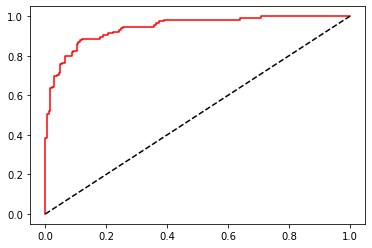

In [52]:
plt.plot(fpr, tpr, '-', c = "r")
plt.plot(x,y,'--' ,c = "black")
plt.show()

In [54]:
#AUC   #Should be above 50%

metrics.roc_auc_score(y_true, y_score)

0.9433607520564042

In [55]:
#Lets use this model to predict how a customer will be, a probability score

#Use a GAINS chart

test['prob'] = model2.predict(test)

<ipython-input-55-78b2d722b323>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prob'] = model2.predict(test)


In [56]:
#Let us arrange the data in groups of 10 so as to categorize them better

test['prob_deciles']=pd.qcut(test['prob'], q=10)

<ipython-input-56-7eb262cf62b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prob_deciles']=pd.qcut(test['prob'], q=10)


In [58]:
test

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target,Hist_Med,prob,prob_deciles
249,Young,Female,Rent,Married,Close,13800,0,Low,18,479,0,0,0.107709,"(0.0921, 0.165]"
353,Middle,Female,Own,Married,Close,86900,0,High,18,315,1,0,0.966836,"(0.856, 0.969]"
537,Young,Male,Rent,Single,Far,20800,0,NewCust,6,655,0,0,0.019468,"(0.0124, 0.0265]"
424,Young,Female,Rent,Single,Close,21900,1,NewCust,12,316,0,0,0.024788,"(0.0124, 0.0265]"
564,Middle,Male,Own,Married,Close,84700,3,NewCust,24,670,1,0,0.797442,"(0.662, 0.856]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Young,Female,Rent,Single,Far,10200,2,Low,18,135,0,0,0.012296,"(-0.000535, 0.0124]"
838,Middle,Male,Rent,Single,Far,49000,0,High,18,992,1,0,0.628962,"(0.329, 0.662]"
974,Young,Male,Rent,Married,Close,45500,0,Medium,6,1255,0,1,0.025987,"(0.0124, 0.0265]"
203,Middle,Male,Own,Married,Close,77000,0,High,12,824,1,0,0.812186,"(0.662, 0.856]"


In [70]:
test.sort_values('prob', ascending = False)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target,Hist_Med,prob,prob_deciles
829,Middle,Male,Own,Married,Far,130600,0,High,18,216,1,0,0.998711,"(0.969, 0.999]"
216,Middle,Female,Rent,Married,Far,120800,1,High,24,1227,1,0,0.997721,"(0.969, 0.999]"
358,Middle,Male,Own,Married,Close,118500,1,High,24,829,1,0,0.997292,"(0.969, 0.999]"
263,Middle,Female,Rent,Married,Close,114100,1,NewCust,24,571,1,0,0.996237,"(0.969, 0.999]"
146,Old,Female,Own,Married,Close,114800,0,High,18,176,1,0,0.995793,"(0.969, 0.999]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,Old,Female,Own,Single,Close,12700,2,Low,6,333,0,0,0.001459,"(-0.000535, 0.0124]"
225,Young,Female,Rent,Single,Close,11400,2,NewCust,6,1054,0,0,0.001323,"(-0.000535, 0.0124]"
937,Young,Female,Rent,Single,Far,20000,3,Low,6,516,0,0,0.000928,"(-0.000535, 0.0124]"
124,Young,Female,Rent,Single,Far,13800,3,Low,6,879,0,0,0.000583,"(-0.000535, 0.0124]"


In [77]:
gains = test.groupby("prob_deciles", as_index = False)['target'].agg(['sum', 'count']).reset_index().sort_values('prob_deciles', ascending = False)

gains.columns = ['Deciles', 'Total Events', 'NumberObs']

In [78]:
gains

,Deciles,Total Events,NumberObs
9,"(0.969, 0.999]",30,30
8,"(0.856, 0.969]",28,30
7,"(0.662, 0.856]",24,30
6,"(0.329, 0.662]",18,30
5,"(0.165, 0.329]",6,30
4,"(0.0921, 0.165]",5,30
3,"(0.0521, 0.0921]",2,30
2,"(0.0265, 0.0521]",1,30
1,"(0.0124, 0.0265]",1,30
0,"(-0.000535, 0.0124]",0,30


In [82]:
gains['perc_events'] = gains['Total Events']/gains['Total Events'].sum()

gains

,Deciles,Total Events,NumberObs,perc_events,Cumulative Events
9,"(0.969, 0.999]",30,30,0.260870,0.260870
8,"(0.856, 0.969]",28,30,0.243478,0.504348
7,"(0.662, 0.856]",24,30,0.208696,0.713043
6,"(0.329, 0.662]",18,30,0.156522,0.869565
5,"(0.165, 0.329]",6,30,0.052174,0.921739
4,"(0.0921, 0.165]",5,30,0.043478,0.965217
3,"(0.0521, 0.0921]",2,30,0.017391,0.982609
2,"(0.0265, 0.0521]",1,30,0.008696,0.991304
1,"(0.0124, 0.0265]",1,30,0.008696,1.000000
0,"(-0.000535, 0.0124]",0,30,0.000000,1.000000


In [83]:
gains['Cumulative Events'] = gains.perc_events.cumsum()

gains

,Deciles,Total Events,NumberObs,perc_events,Cumulative Events
9,"(0.969, 0.999]",30,30,0.260870,0.260870
8,"(0.856, 0.969]",28,30,0.243478,0.504348
7,"(0.662, 0.856]",24,30,0.208696,0.713043
6,"(0.329, 0.662]",18,30,0.156522,0.869565
5,"(0.165, 0.329]",6,30,0.052174,0.921739
4,"(0.0921, 0.165]",5,30,0.043478,0.965217
3,"(0.0521, 0.0921]",2,30,0.017391,0.982609
2,"(0.0265, 0.0521]",1,30,0.008696,0.991304
1,"(0.0124, 0.0265]",1,30,0.008696,1.000000
0,"(-0.000535, 0.0124]",0,30,0.000000,1.000000


In [86]:
#The top 90 customers to target are:

test

test.sort_values('prob', ascending = False)[['Cust_Id']].head(90)

,Cust_Id
829,216
216,1227
358,829
263,571
146,176
...,...
269,605
681,907
311,75
25,1136
